# Implementing Trading with Machine Learning Regression - Part - 1

There are four parts when implementing trading strategies with machine learning regression are:
1. Part 1: Data Preparation
2. Part 2: Data Preprocessing and Prediction
3. Part 3: Strategy Analytics
4. Part 4: Performance Analysis

In this notebook, we will import the data, create indicators and define dependent and independent variables. The key steps are:
1. Read GLD data
2. Create Input Parameters
3. Create X and y Datasets

### Import the Libraries

In [12]:
# Data manipulation
import pandas as pd 
import numpy as np 

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

### Read GLD data

We have saved the Gold (GLD) ETF data of OHLC format in a CSV file gold_prices.csv

In [13]:
# Read the data
gold_prices = pd.read_csv('data/gold_prices.csv', parse_dates=['Date'], index_col='Date')

# Print dataframe
gold_prices.head()

,Open,High,Low,Close
Date,,,,
2013-04-15,136.000000,136.750000,130.509995,131.309998
2013-04-16,134.899994,135.110001,131.759995,132.800003
2013-04-17,133.809998,134.949997,132.320007,132.869995
2013-04-18,134.119995,135.309998,133.619995,134.300003
2013-04-19,136.000000,136.020004,134.600006,135.470001


Now  we will check for outliers by plotting Close column of gold_prices.

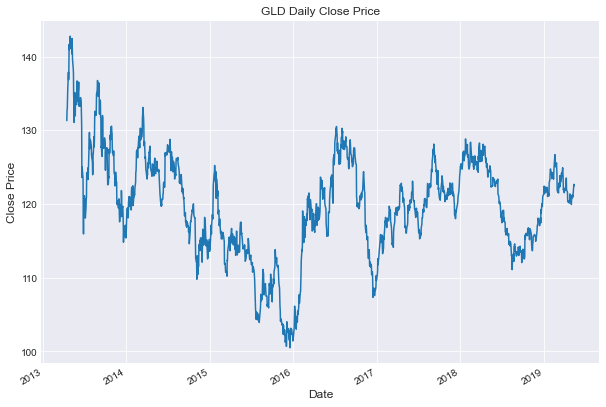

In [14]:
# Plot the closing price of GLD
gold_prices['Close'].plot(figsize=(10,7))
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.title('GLD Daily Close Price', fontsize=12)
plt.show()

From the above plot we don't see any outliers. Let's check for NaN values

In [15]:
# Here we check for NaN values
gold_prices.isna().sum(axis=0)

Open     0
High     0
Low      0
Close    0
dtype: int64

Here we can clearly see our data has zero NaN values

### Create Input Parameters
We will create custom indicators, which will help in making the prediction more accurate.

1. `S_3`, `S_15`, `S_60`: 3-days, 15-days and 60-days moving average for GLD `Close` prices, respectively.
2. `Corr`: Compute the correlation between the `Close` price and `S_3`.
3. `Std_U`,`Std_D`:Difference between `High & Open`, `Open & Low` respectively.
4. `OD`,`OL`:Difference between `Open & previous day'open`, and `Open & previous day's Close` respectively

In [19]:
# Calculate 3-day moving average of close prices
gold_prices['S_3'] = gold_prices['Close'].shift(1).rolling(window=3).mean()

# Calculate 15-day moving average of close prices
gold_prices['S_15'] = gold_prices['Close'].shift(1).rolling(window=15).mean()

# Calculate 60-day moving average of close prices
gold_prices['S_60'] = gold_prices['Close'].shift(1).rolling(window=60).mean()

# Calculate the correlation between close price and 3 day moving average
gold_prices['Corr'] = gold_prices['Close'].shift(1).rolling(window=10).corr(gold_prices['S_3'].shift(1))

# Calcualte the difference between High & Open, Open & Low
gold_prices['Std_U'] = gold_prices['High'] - gold_prices['Open']
gold_prices['Std_D'] =  gold_prices['Open'] - gold_prices['Low']

# Calculate the differene between `Open & previous day's open`, and `Open & previous day's Close`
gold_prices['OD'] = gold_prices['Open'] - gold_prices['Open'].shift(1)
gold_prices['OL'] =  gold_prices['Open'] - gold_prices['Close'].shift(1)

gold_prices.tail()

,Open,High,Low,Close,S_3,S_15,S_60,Corr,Std_U,Std_D,OD,OL
Date,,,,,,,,,,,,
2019-05-08,121.540001,121.540001,120.769997,120.910004,120.890000,120.606668,122.611834,-0.221595,0.000000,0.770004,0.520004,0.330002
2019-05-09,120.959999,121.620003,120.860001,121.199997,120.976667,120.633335,122.567001,-0.290695,0.660004,0.099998,-0.580002,0.049995
2019-05-10,121.410004,121.730003,121.300003,121.430000,121.106667,120.694668,122.522667,-0.280418,0.319999,0.110001,0.450005,0.210007
2019-05-13,122.629997,122.849998,122.330002,122.669998,121.180000,120.765334,122.490334,0.078028,0.220001,0.299995,1.219993,1.199997
2019-05-14,122.599998,122.660004,122.120003,122.459999,121.766665,120.918667,122.467167,0.365089,0.060006,0.479995,-0.029999,-0.070000
